In [2]:
include("/Users/gr_1/Documents/lemur/julia/run_lemur.jl")
include("/Users/gr_1/Documents/isoflex/IsoFlex.jl")
#using Plots
lemur_params = lemur_obj();
#using JLD

In [4]:
function dt(t)
    r_ = 100
    a = 1e-5
    m = 500
    n = 500
    U=zeros(m,n)
    for i = 1:m
        for j=1:n
            r = sqrt((Float64(i-m/2.00)^2+Float64(j-n/2.00)^2))
            U[i,j] = a * exp(-r^2/r_^2)

        end
    end
    return U
end

dt (generic function with 1 method)

In [5]:
function Isovary(t)
    dT = 30e6 #1/2 cycle duration
    tu = floor(t/dT)
    dt = 1e6
    if mod(tu,2) == 1
       c1 = 6-(t-dT*tu)/dT *5
       c2 = 6-(t+dt-dT*tu)/dT *5
    else
       c1 = 1+(t-dT*tu)/dT *5
       c2 = 1+(t+dt-dT*tu)/dT *5
    end

    W = zeros(500,500)
    W[200:300, 200:300] .= 200
    U1 = IsoFlex.flexural(W, Nx = 0, Ny = -1000*2750*1e6*9.81*c1, dx=1000, dy=1000, Te = 30e3, ncores=6);
    U2 = IsoFlex.flexural(W, Nx = 0, Ny = -1000*2750*1e6*9.81*c2, dx=1000, dy=1000, Te = 30e3, ncores=6);

    return (U2-U1)/dt
end

Isovary (generic function with 1 method)

In [6]:
function Isovary_total(t)
    dT = 30e6 #1/2 cycle duration
    tu = floor(t/dT)
    dt = 1e6
    if mod(tu,2) == 1
       c1 = 6-(t-dT*tu)/dT *5
       c2 = 6-(t+dt-dT*tu)/dT *5
    else
       c1 = 1+(t-dT*tu)/dT *5
       c2 = 1+(t+dt-dT*tu)/dT *5
    end

    W = zeros(500,500)
    W[200:300, 200:300] .= 200
    U1 = IsoFlex.flexural(W, Nx = 0, Ny = -1000*2750*1e6*9.81*c1, dx=1000, dy=1000, Te = 30e3, ncores=6);
    U2 = IsoFlex.flexural(W, Nx = 0, Ny = -1000*2750*1e6*9.81*c2, dx=1000, dy=1000, Te = 30e3, ncores=6);

    return U1
end

Isovary_total (generic function with 1 method)

In [7]:
#save("./Zi.jld", "Zi", Zi)
Zi = load("Zi.jld","Zi");

UndefVarError: [91mUndefVarError: load not defined[39m

In [3]:
lemur_params = lemur_obj()
lemur_params.t_c = 0e6
lemur_params.dt = 1e6
lemur_params.flex = 30000e3

lemur_params.z = lemur_params.z+rand(500,500)
#lemur_params.z[:, 1:100] .= 100
#lemur_params.z[1:100, :] .= 100
#lemur_params.z[:, end-100:end] .= 100
#lemur_params.z[end-100:end, :] .= 100

lemur_params.t = 100e6
#lemur_params.z = Zi#copy(data_100[1].z[:,:,1])
#lemur_params.k[1:250,:] .= 8e-7
#lemur_params.z = Zi
lemur_params.k[:,:] .= 1e-6
bcx = zeros(500,500)
bcx[:,1] .= 1
bcx[end,:] .= 0
bcx[1,:] .= 0
bcx[:,end] .= 0
lemur_params.precip = 1.5
lemur_params.bcx = bcx
lemur_params.bc = findall(bcx == 1)
lemur_params.uselandsed = 1
#lemur_params.ufunc = dt
lemur_params.u = zeros(500,500).+.000002
data_100 = run_lemur.run(lemur_params,compute_sedflux=true)

k undercapacity z dx 1000.0
here2 2 
dy 1000.0
here2 3 
t 1.0e8
here2dt 1.0e6
here2display 1.0
here2Udt 2.3648999563e-314
here2flex 3.0e7
here2kd 1.0
here2m 0.5
here2n 1.0
here2bc Float64[]
wdt 2.3649000353e-314
here2firstcall 1.0
here2u udt 100000.0
here2ny 500.0
here2nx 500.0
here2deposit 0.0
here2srho 2400.0
here2drawdt 2.3649015057e-314
here2l 1.0
here2ks 0.0
here2t_c 0.0
here2sinkfill 1.0
here2uselandsed 1.0
here2maxareasinkfill 1.0e6
here2precip 1.5
here2evaprate 1.0e-30
here2bcx k_sed 1.0e-6t: parameter not founddisplay: parameter not foundUdt: parameter not foundflex: parameter not foundwdt: parameter not foundudt: parameter not foundny: parameter not foundnx: parameter not founddeposit: parameter not foundsrho: parameter not founddrawdt: parameter not foundt_c: parameter not foundsinkfill: parameter not foundbcx: parameter not foundk_sed: parameter not foundz111
here1x
here2x
z
i0


InterruptException: [91mInterruptException:[39m

In [12]:
maximum(data_100[1].z[:,:,:])

500×500×1 Array{Float64,3}:
[:, :, 1] =
 0.839686     0.792215     0.430438  …     0.61257      0.892032  0.306536 
 0.0       2000.64      2000.37         2001.23      2003.72      0.101903 
 0.0       2006.94      2005.86         2003.51      2007.54      0.765728 
 0.0       2010.04      2004.01         2002.49      2002.49      0.679294 
 0.0       2004.08      2004.01         2008.42      2004.26      0.352111 
 0.0       2004.47      2005.03      …  2008.56      2009.93      0.0425204
 0.0       2009.74      2002.1          2002.82      2002.82      0.249593 
 0.0       2010.05      2002.1          2003.4       2004.56      0.538703 
 0.0       2002.1       2007.84         2002.78      2007.57      0.958789 
 0.0       2008.44      2006.27         2002.77      2000.88      0.915204 
 0.0       2006.58      2004.31      …  2002.59      2000.78      0.656264 
 0.0       2008.15      2004.59         2006.93      2004.78      0.748561 
 0.0       2009.02      2002.6          2006.56 

In [ ]:
include("/Users/gr_1/Documents/lemur/julia/run_lemur.jl")
lemur_params = lemur_obj()
lemur_params.t_c = 0e6
lemur_params.dt = .1e6
lemur_params.flex = 30e6
#lemur_params.z = lemur_params.z+rand(500,500)
lemur_params.t = 90e6
lemur_params.z = Zi#copy(data_100[1].z[:,:,1])
#lemur_params.k[1:250,:] .= 8e-7
lemur_params.k[:,:] .= 1e-6
bcx = zeros(500,500)
bcx[:,1] .= 1
bcx[end,:] .= 0
bcx[1,:] .= 0
bcx[:,end] .= 0

lemur_params.bcx = bcx
lemur_params.bc = findall(bcx == 1)
lemur_params.ufunc = dt
lemur_params.u = zeros(500,500).+.000002
data_100 = run_lemur.run(lemur_params,compute_sedflux=true)

In [ ]:
using Plots
pyplot()
ti = 1
Plots.scalefontsizes(1/10)
ch = copy(data_100[1].chi[:,:,ti])
a = copy(data_100[1].a[:,:,ti])
ch[a .<100] .= NaN
plt = plot(
heatmap((data_100[1].z[:,:,ti]),clim=(0,100),c= cgrad(:terrain,[.25,.5,.75], rev = false),title="0 Myr Elevation (m)"),
heatmap((data_100[1].z[:,:,ti]),clim=(0,100),c= cgrad(:terrain,[.25,.5,.75], rev = false),title="45 Myr Elevation (m)"),
heatmap(ch,c= cgrad(:bluesreds,[.5], rev = false),clim=(.0,.1), bgcolor=:black,size=(1400, 400), title="45 Myr Chi (1/m)"),layout=grid(1,3),
    titlefontsize=8,xtickfontsize=8,ytickfontsize=8)

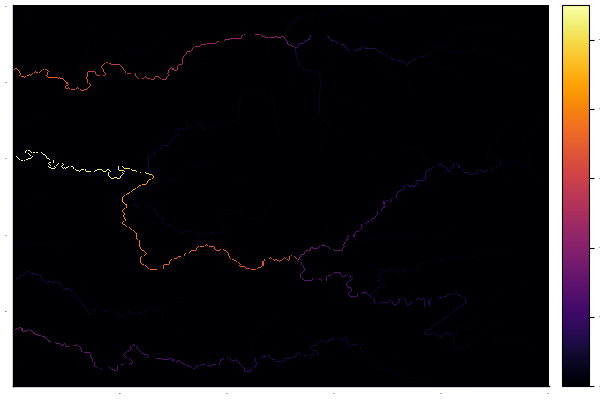

In [106]:
heatmap(a)

In [10]:
## Compare too variable thing

In [138]:
.03/1e6 * 1000

2.9999999999999997e-5

In [21]:
include("/Users/gr_1/Documents/lemur/julia/run_lemur.jl")
lemur_params = lemur_obj()
lemur_params.t_c = 0e6
lemur_params.dt = 1e6
lemur_params.flex = 30e6
#lemur_params.z = lemur_params.z+rand(500,500)
lemur_params.t = 400e6
lemur_params.z = Zi#copy(data_100[1].z[:,:,1])
#lemur_params.k[1:250,:] .= 8e-7
lemur_params.k[:,:] .= 1e-6
bcx = zeros(500,500)
bcx[:,1] .= 1
bcx[end,:] .= 0
bcx[1,:] .= 0
bcx[:,end] .= 0
lemur_params.bcx = bcx
lemur_params.bc = findall(bcx == 1)
lemur_params.ufunc = Isovary
lemur_params.u = zeros(500,500).+.000002
data_100 = run_lemur.run(lemur_params,compute_sedflux=true)

k undercapacity z dx 1000.0
here2 2 
dy 1000.0
here2 3 
t 4.0e8
here2dt 1.0e6
here2display 1.0
here2Udt 2.2703066537e-314
here2flex 3.0e7
here2kd 1.0
here2m 0.5
here2n 1.0
here2bc Float64[]
wdt 2.2703143295e-314
here2firstcall 1.0
here2u udt 100000.0
here2ny 500.0
here2nx 500.0
here2deposit 0.0
here2srho 2400.0
here2drawdt 2.2703143295e-314
here2l 1.0
here2ks 0.0
here2t_c 0.0
here2sinkfill 1.0
here2uselandsed 0.0
here2maxareasinkfill 1.0e6
here2precip 1.0
here2evaprate 1.0e-30
here2bcx k_sed 1.0e-6t: parameter not founddisplay: parameter not foundUdt: parameter not foundflex: parameter not foundwdt: parameter not foundudt: parameter not foundny: parameter not foundnx: parameter not founddeposit: parameter not foundsrho: parameter not founddrawdt: parameter not foundt_c: parameter not foundsinkfill: parameter not foundbcx: parameter not foundk_sed: parameter not foundzz0
2

.0114972045567514
00000  0.916048 seconds (319.09 k allocations: 371.466 MiB, 20.15% gc time)
250000.0
250000.0
z0
-0.027117112860050634
00000  0.489304 seconds (2.73 k allocations: 355.377 MiB, 4.09% gc time)
250000.0
250000.0
z0
-0.05031792253846219
00000  0.506975 seconds (2.87 k allocations: 355.386 MiB, 3.98% gc time)
250000.0
250000.0
z0
-0.041920026992102725
00000  0.561968 seconds (2.87 k allocations: 355.386 MiB, 18.73% gc time)
250000.0
250000.0
z0
-0.04579592467488707
00000  0.455304 seconds (2.73 k allocations: 355.377 MiB, 3.70% gc time)
250000.0
250000.0
z0
-0.043984583089158
00000  0.462066 seconds (2.87 k allocations: 355.386 MiB, 3.67% gc time)
250000.0
250000.0
z0
-0.04459167830619597
00000  0.467287 seconds (2.87 k allocations: 355.386 MiB, 4.16% gc time)
250000.0
250000.0
z0
-0.032890391923987045
00000  0.550183 seconds (2.87 k allocations: 355.386 MiB, 18.98% gc time)
250000.0
250000.0
z0
-0.06743272468418782
00000  0.453399 seconds (2.73 k allocations: 355.377 MiB

(Main.run_lemur.datas([1.4673933788022018 1.4673933788123086 … 1.46739338140529 1.4673933813948794; 1.4673933787902498 1.4673933788003868 … 1.467393381399005 1.467393381388577; … ; 1.467393378726938 1.4673933787374223 … 1.467393381281093 1.467393381270092; 1.4673933787389213 1.4673933787493743 … 1.4673933812872966 1.4673933812763154]

[0.03897855040908241 0.038978550410591895 … 0.03897855046300807 0.038978550461680944; 0.03897855040571358 0.038978550407215394 … 0.038978550459428024 0.03897855045810916; … ; 0.038978550381548516 0.03897855038348929 … 0.03897855037249821 0.03897855037056734; 0.0389785503848962 0.038978550386843724 … 0.03897855037602063 0.03897855037408301]

[0.03261105174907778 0.0326110517504646 … 0.0326110518370928 0.032611051835792375; 0.03261105174545929 0.03261105174683793 … 0.03261105183316581 0.03261105183187398; … ; 0.03261105173393539 0.03261105173570197 … 0.032611051757472455 0.032611051755692795; 0.03261105173751696 0.03261105173929101 … 0.03261105176140434 0.0

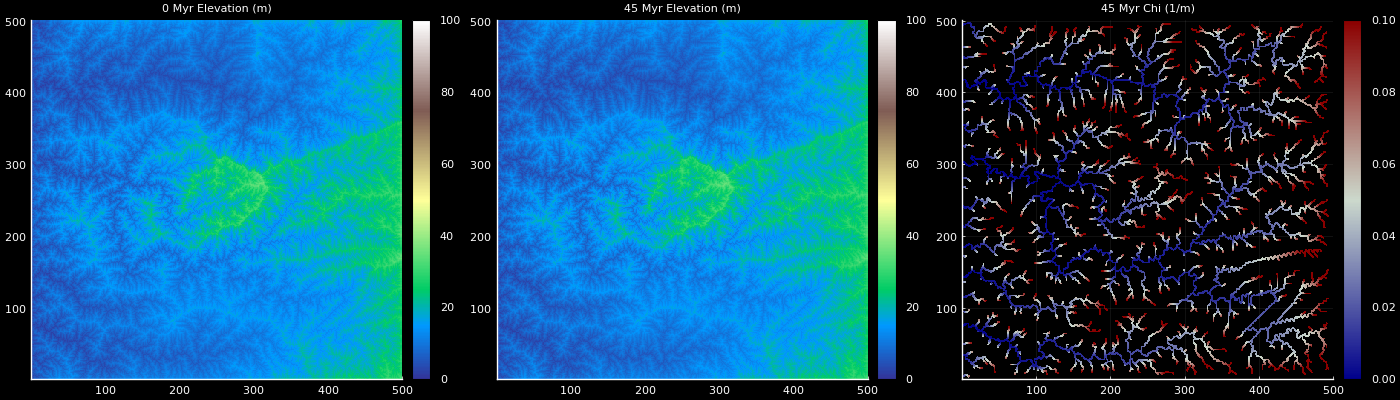

In [24]:
using Plots
pyplot()
ti = 200
Plots.scalefontsizes(1/10)
ch = copy(data_100[1].chi[:,:,ti])
a = copy(data_100[1].a[:,:,ti])
ch[a .<100] .= NaN
plt = plot(
heatmap((data_100[1].z[:,:,ti]),clim=(0,100),c= cgrad(:terrain,[.25,.5,.75], rev = false),title="0 Myr Elevation (m)"),
heatmap((data_100[1].z[:,:,ti]),clim=(0,100),c= cgrad(:terrain,[.25,.5,.75], rev = false),title="45 Myr Elevation (m)"),
heatmap(ch,c= cgrad(:bluesreds,[.5], rev = false),clim=(.0,.1), bgcolor=:black,size=(1400, 400), title="45 Myr Chi (1/m)"),layout=grid(1,3),
    titlefontsize=8,xtickfontsize=8,ytickfontsize=8)

In [ ]:
using Plots
pyplot()
Plots.scalefontsizes(1/10)
anim = @animate for ti =1:1:400
ch = copy(data_100[1].chi[:,:,ti])
a = copy(data_100[1].a[:,:,ti])
ch[a .<100] .= NaN
plt = plot(
heatmap((data_100[1].z[:,:,ti]),clim=(0,100),c= cgrad(:terrain,[.25,.5,.75], rev = false),title="Elevation (m)"),
heatmap(Isovary_total(ti*1e6), clim=(-40,120),title="Uplift (m)"),
heatmap(ch,c= cgrad(:bluesreds,[.5], rev = false),clim=(.0,.15), bgcolor=:black, title="chi (m)",
            xaxis = ("Distance (km)")),layout=grid(1,3),size=(1400,400),xtickfontsize=8,ytickfontsize=8,titlefontsize=8)
annotate!(200, 480, text("Time = " * string(ti) * " Myr", :black, :left, 20))

end
gif(anim, "anim_fps15.gif", fps = 7)


In [ ]:
mean()

In [ ]:
using Plots
pyplot()
a = zeros(length(data_100[1].u2[1,1,:]))
for i = 1:length(data_100[1].u2[1,1,:])
    a1  = 
    a[i] = sum(data_100[1].u2[3,:,i] /1e3 *2)
end
plot(0:.5:200,a,ylims=(0,3e4),legend=false,linewidth=3,xlabel = "Model run time (Myr)",ylabel="Sediment flux to southern margin ( km3 / Myr )" )
plot!(65:.1:65.1,0:3e4:3e4)

In [ ]:
plot(log.(a1[a1.>0]))

In [70]:
using Statistics
maximum(vec(data_100[1].u2[:,:,100]))

189.3223709094582

In [ ]:
using Plots
a = zeros(length(data_100[1].u2[1,1,:]))
a1 = zeros(500)
for i = 1:length(data_100[1].u2[1,1,:])
    a1[:] .= data_100[1].u2[3,:,i]

    a[i] = sum(data_100[1].u2[3,:,i])
end
plot(0:.5:200,a,ylims=(0,1e7),legend=false,linewidth=3)

In [ ]:
lemur_params = lemur_obj()
lemur_params.t_c = 1e6
lemur_params.dt = .5e6
lemur_params.t = 200e6
lemur_params.flex = 40e3
lemur_params.k[:,:] .= 5e-7
lemur_params.z[1:250,:] .-= 2000
data_5 = run_lemur.run(lemur_params)

In [ ]:
lemur_params.t_c = 300e6
lemur_params.dt = .5e6
lemur_params.t = 50e6
lemur_params.flex = 40e3
lemur_params.k[:,:] .= 5e-7
lemur_params.z[1:250,:] .-= 2000
data_50_demo = run_lemur.run(lemur_params)

In [ ]:
data = data_100
@gif for t = 2:30:size(data[1].z)[3]
plt = plot(
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false)  ,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)"),
    heatmap(data[1].chi[:,:,t],
    xaxis = ("Distance (km)"),yaxis = ("Distance (km)"), clim=(.5,1),title="Swath Elevation (m)"  ), layout=grid(1, 2),
    size=(1000,1500))
   
annotate!(200, 480, text("Time = " * string(t/2) * " Myr", :black, :left, 20),)
end



In [ ]:
using Plots
using Statistics
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_100
@gif for t = 2:30:size(data[1].z)[3]
plt = plot(
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false)  ,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)"),
    heatmap(data[1].u[:,:,t]*2,c= cgrad(:RdBu_10,[.1], rev = true)  ,
    xaxis = ("Distance (km)"),clim=(-3,30),title="Uplift rate (m/Myr)",yaxis = false),
    heatmap(mean(data[1].chi[:,:,t],dims=2),linewidth=2,
    xaxis = ("Distance (km)"),yaxis = false, ylim=(0,2500),title="Swath Elevation (m)"  ), layout=grid(1, 3),
    size=(2000,1500))
   
annotate!(200, 480, text("Time = " * string(t/2) * " Myr", :black, :left, 20),)
end



In [75]:
anim()

31

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_5

@gif for t = 2:5:401
plt = plot(
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false)  ,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)"),
    heatmap(data[1].u[:,:,t]*2,c= cgrad(:RdBu_10,[.1], rev = true)  ,
    xaxis = ("Distance (km)"),clim=(-3,30),title="Uplift rate (m/Myr)",yaxis = false),
    heatmap(data[1].z[:,:,t-1]*2 - data[1].z[:,:,t]*2+data[1].u[:,:,t] .* 2,c= cgrad(:RdBu_10,[.1], rev = true)  ,
    xaxis = ("Distance (km)"),yaxis = false, clim=(-6,60),title="Erosion rate (m/Myr)"),
    plot(mean(data[1].z[:,:,t],dims=2),linewidth=2,
    xaxis = ("Distance (km)"),yaxis = false, ylim=(0,2500),title="Swath Elevation (m)"  ),layout=grid(2, 2),
    size=(2000,1500))
annotate!(200, 480, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
data_5[1].u2

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_Inf

@gif for t = 2:5:401
plt = plot(
    plot(mean(data[1].z[:,:,t],dims=2),linewidth=2,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),title="Elevation (m)",zlim=(0,2500)),
    plot(mean(data[1].z[:,:,t-1]-data[1].z[:,:,t]+data[1].u[:,:,t],dims=2),linewidth=2,
    xaxis = ("Distance (km)"),yaxis = false, ylim=(0,100),title="Erosion rate (m/Myr)"),layout=(1, 2))
    
annotate!(200, 10, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_100

@gif for t = 2:5:401
plt = plot(
    plot(mean(data[1].z[:,:,t],dims=2)*2,linewidth=2,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),title="Elevation (m)",ylim=(0,2500)),
    plot(mean(data[1].u[:,:,t],dims=2)*2,linewidth=2,
    xaxis = ("Distance (km)"),yaxis = false, ylim=(-5,15),title="Uplift rate (m/Myr)"),layout=(1, 2))
    
annotate!(200, 10, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_50_demo

@gif for t = 2:5:101
plt = plot(
    plot(mean(data[1].z[:,:,t],dims=2)*2,linewidth=2,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),title="Elevation (m)",ylim=(0,2500)),
    plot(mean(data[1].u[:,:,t],dims=2)*2,linewidth=2,
    xaxis = ("Distance (km)"),yaxis = false, ylim=(-5,15),title="Uplift rate (m/Myr)"),layout=(1, 2))
    
annotate!(200, 10, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_Inf_demo

@gif for t = 2:5:101
plt = plot(
    plot(mean(data[1].z[:,:,t],dims=2)*2,linewidth=2,
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),title="Elevation (m)",ylim=(0,5000)),
    plot(mean(data[1].u[:,:,t],dims=2)*2,linewidth=2,
    xaxis = ("Distance (km)"),yaxis = false, ylim=(-5,15),title="Uplift rate (m/Myr)"),layout=(1, 2))
    
annotate!(200, 10, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
using Plots
pyplot()
#font = Plots.font("Helvetica", 18, weight= "light")
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
@gif for t = 1:5:401
data = data_Inf
plt = plot(
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1500,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)"),
    heatmap(data[1].u[:,:,t]*2,c= cgrad(:RdBu_10,[.1], rev = true),size=(1500,500),
    xaxis = ("Distance (km)"),clim=(-3,30),title="Uplift rate (m/Myr)",yaxis = false),
    heatmap(data[1].z[:,:,t-1]*2 - data[1].z[:,:,t]*2+(data[1].u[:,:,t]*2),c= cgrad(:RdBu_10,[.1], rev = true),size=(1600,500),
    xaxis = ("Distance (km)"),yaxis = false, clim=(-60,600),title="Erosion rate (m/Myr)"),layout=(1,3))
annotate!(200, 480, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
lemur_params.t_c = 100000000000000000000e6
data_Inf = run_lemur.run(lemur_params)

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_Inf_demo

@gif for t = 2:5:101
plt = plot(
    plot(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1500,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)"),
    heatmap(data[1].u[:,:,t]*2,c= cgrad(:RdBu_10,[.1], rev = true),size=(1500,1500),
    xaxis = ("Distance (km)"),clim=(-3,30),title="Uplift rate (m/Myr)",yaxis = false),
    heatmap(data[1].z[:,:,t-1]*2 - data[1].z[:,:,t]*2+data[1].u[:,:,t] .* 2,c= cgrad(:RdBu_10,[.1], rev = true),size=(1500,500),
    xaxis = ("Distance (km)"),yaxis = false, clim=(-6,60),title="Erosion rate (m/Myr)"),layout=(1, 3))
    
annotate!(200, 480, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
using Plots
gr()
#font = Plots.font("Helvetica", 18, weight= "light")
#pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
data = data_50_demo

@gif for t = 2:5:101
plt = plot(
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1500,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)"),
    heatmap(data[1].u[:,:,t]*2,c= cgrad(:RdBu_10,[.1], rev = true),size=(1500,1500),
    xaxis = ("Distance (km)"),clim=(-3,30),title="Uplift rate (m/Myr)",yaxis = false),
    heatmap(data[1].z[:,:,t-1]*2 - data[1].z[:,:,t]*2+data[1].u[:,:,t] .* 2,c= cgrad(:RdBu_10,[.1], rev = true),size=(1500,500),
    xaxis = ("Distance (km)"),yaxis = false, clim=(-6,60),title="Erosion rate (m/Myr)"),layout=(1, 3))
    
annotate!(200, 480, text("Time = " * string(t/2) * " Myr", :black, :left, 12))
end 

In [ ]:
#ont = Plots.font("Helvetica", 18, weight= "light")
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
t = 401
data = data_100
plt = plot( 
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500)),
    heatmap(data[1].u[:,:,t],c= cgrad(:RdBu_10,[.13], rev = true),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(-2,10)))


In [ ]:
lemur_params.t_c = 200e6
data_200 = run_lemur.run(lemur_params)

In [1]:
font = Plots.font("Helvetica", 18, weight= "light")
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
t = 200
plt = plot( 
    heatmap(data_10[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,300)),
    heatmap(data_10[1].u[:,:,t],c= cgrad(:RdBu_10,[.1], rev = true),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(-2,10)))


UndefVarError: [91mUndefVarError: Plots not defined[39m

In [ ]:
@gif
for i =1:5:401
heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(500,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500),title="Elevation (m)")
end


In [ ]:
font = Plots.font("Helvetica", 18, weight= "light")
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
t = 1000
plt = plot( 
    heatmap(data_10[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,2500)),
    heatmap(data_10[1].u[:,:,t],c= cgrad(:RdBu_10,[.1], rev = true),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(-2,10)))


In [ ]:
lemur_params.t_c = 100000000000000e6
data_inf = run_lemur.run(lemur_params)

In [90]:
#font = Plots.font("Helvetica", 18, weight= "light")
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)
t = 1000
data = data_100
plt = plot(
    heatmap(data[1].z[:,:,t],c= cgrad(:terrain,[.5], rev = false),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(0,300)),
    heatmap(data[1].u[:,:,t],c= cgrad(:RdBu_10,[.1], rev = true),size=(1300,500),
    xaxis = ("Distance (km)"), yaxis = ("Distance (km)"),clim=(-2,10)))

┌ Warning: Skipped font arg: font (typeof(font))
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/args.jl:953
┌ Warning: Skipped font arg: font (typeof(font))
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/args.jl:953
┌ Warning: Skipped font arg: font (typeof(font))
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/args.jl:953
┌ Warning: Skipped font arg: font (typeof(font))
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/args.jl:953
┌ Warning: Skipped font arg: font (typeof(font))
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/args.jl:953
┌ Warning: Skipped font arg: font (typeof(font))
└ @ Plots /Users/gr_1/.julia/packages/Plots/uCh2y/src/args.jl:953


UndefVarError: [91mUndefVarError: data_Inf not defined[39m

In [ ]:
data_10

In [ ]:
function getswath(z)
        
end

In [21]:
z = data_50[1].z;

In [24]:
sumu = zeros([sizeof(z), t])

MethodError: [91mMethodError: no method matching zeros(::Array{Int64,1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  zeros([91m::Union{Integer, AbstractUnitRange}...[39m) at array.jl:456[39m
[91m[0m  zeros([91m::Type{StaticArrays.SArray{Tuple{N},T,1,N} where T}[39m) where N at /Users/gr_1/.julia/packages/StaticArrays/rdb0l/src/SVector.jl:32[39m
[91m[0m  zeros([91m::Type{StaticArrays.MArray{Tuple{N},T,1,N} where T}[39m) where N at /Users/gr_1/.julia/packages/StaticArrays/rdb0l/src/MVector.jl:25[39m
[91m[0m  ...[39m

In [10]:
using Statistics

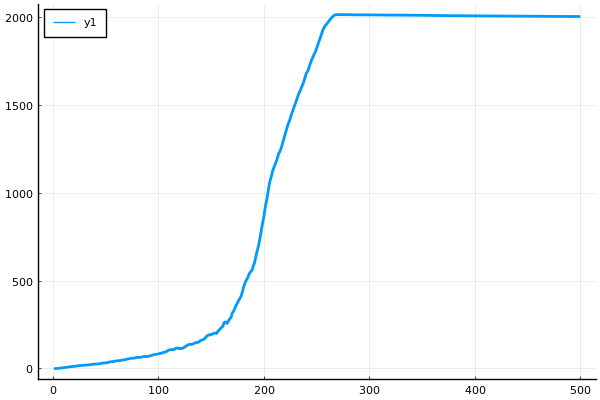

In [93]:
t = 201

plot(mean(data_100[1].z[:,:,t],dims=2),linewidth=2)
#plot!(mean(data_200[1].z[:,:,1000],dims=2),linewidth=2)
#plot!(mean(data_inf[1].z[:,:,t],dims=2),linewidth=2)

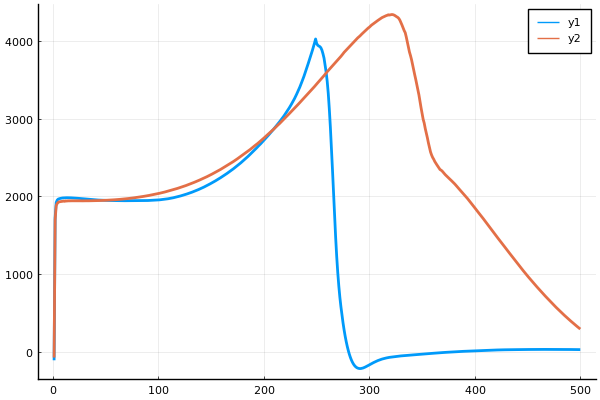

In [67]:
t = 1000
data = data_50_dk
sumu = data_50_dk[1].u[:,:,t]
for i = 2:t
    sumu += data[1].u[:,:,t]
end

plot(mean(data[1].z[:,:,1]-data[1].z[:,:,t]+sumu,dims=2),linewidth=2)

# if false
# sumu = data_200[1].u[:,:,1]
# for i = 2:t
#     sumu += data_50[1].u[:,:,t]
# end

# plot!(mean(data_200[1].z[:,:,1]-data_200[1].z[:,:,t]+sumu,dims=2),linewidth=2)

sumu = data_inf[1].u[:,:,1]
for i = 2:t
    sumu += data_inf[1].u[:,:,t]
end

plot!(mean(data_inf[1].z[:,:,1]-data_inf[1].z[:,:,t]+sumu,dims=2),linewidth=2)
#plot(mean(data_50[1].z[:,:,1]-data_50[1].z[:,:,t]+sumu,dims=2),linewidth=2)


In [79]:
import ipyleaflet 


ArgumentError: [91mArgumentError: Package ipyleaflet not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("ipyleaflet")` to install the ipyleaflet package.[39m


In [55]:
data = data_10

heatmap(data[1].z[:,:,t]- data[1].z[:,:,t-1]+data[1].z[:,:,t]-data[1].z[:,:,t-1],clim=(-10, 0))

UndefVarError: [91mUndefVarError: data_10 not defined[39m

In [ ]:
## Te 10 km 

lemur_params.flex = 10e3
lemur_params.t_c = 10000000000000000e6
data_inf = run_lemur.run(lemur_params)

In [ ]:
## Te 10 km 
lemur_params.flex = 10e3
lemur_params.t_c = 50e6
data_10 = run_lemur.run(lemur_params)

In [ ]:
lemur_params.t_c = 100000000000000000000000000000000000000e6
lemur_params.t = 10e6
lemur_params.dt = .1e6
data_100 = run_lemur.run(lemur_params)

In [ ]:
lemur_params.t_c = 200e6
lemur_params.t = 200e6 
lemur_params.dt = .2e6
data_200 = run_lemur.run(lemur_params)

In [ ]:
lemur_params.t_c = 200e6
data_1000 = run_lemur.run(lemur_params)

In [ ]:
## Te 10 km 

lemur_params.flex = 10e3
lemur_params.t_c = 10e6
data_10 = run_lemur.run(lemur_params)